<a href="https://colab.research.google.com/github/Faisal-58/Deep-Learning/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [6]:
mask_files = os.listdir('/content/data/with_mask')
print(mask_files[0:5])
print(mask_files[-5:])

['with_mask_3009.jpg', 'with_mask_2803.jpg', 'with_mask_1.jpg', 'with_mask_3338.jpg', 'with_mask_570.jpg']
['with_mask_2195.jpg', 'with_mask_432.jpg', 'with_mask_2259.jpg', 'with_mask_2413.jpg', 'with_mask_2607.jpg']


In [7]:
mask_files_without = os.listdir('/content/data/without_mask')
print(mask_files_without[0:5])
print(mask_files_without[-5:])

['without_mask_3589.jpg', 'without_mask_1876.jpg', 'without_mask_174.jpg', 'without_mask_763.jpg', 'without_mask_2609.jpg']
['without_mask_3420.jpg', 'without_mask_2822.jpg', 'without_mask_1265.jpg', 'without_mask_1963.jpg', 'without_mask_1772.jpg']


In [8]:
print ('Number of images with mask:', len(mask_files))
print ('Number of images witout mask:', len(mask_files_without))


Number of images with mask: 3725
Number of images witout mask: 3828


In [9]:
# Creating labels
with_mask_labels = [1] * 3725
without_mask_labels = [0] * 3828


In [10]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


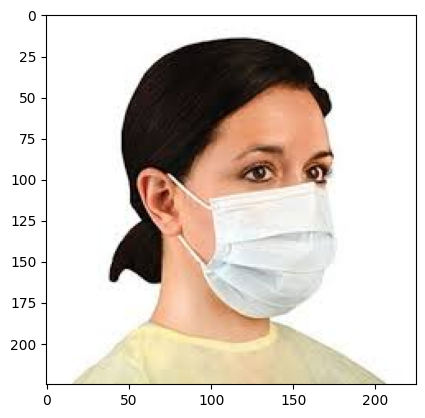

In [13]:
# Displaying the images
img  = mpimg.imread('/content/data/with_mask/with_mask_2315.jpg')
imgplot = plt.imshow(img)
plt.show()

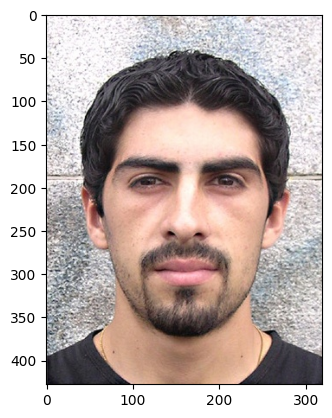

In [14]:
img  = mpimg.imread('/content/data/without_mask/without_mask_3589.jpg')
imgplot = plt.imshow(img)
plt.show()

In [15]:
# Image Processing
mask_path = '/content/data/with_mask/'
data =[]
for img_file in mask_files:
  image = Image.open(mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in mask_files_without:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)




/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
len(data)

7553

In [18]:
X= np.array(data)
Y = np.array(labels)

In [19]:
X

array([[[[160, 150, 141],
         [160, 150, 141],
         [160, 150, 141],
         ...,
         [192, 191, 187],
         [192, 191, 187],
         [192, 191, 187]],

        [[160, 150, 141],
         [160, 150, 141],
         [160, 150, 141],
         ...,
         [192, 191, 187],
         [192, 191, 187],
         [192, 191, 187]],

        [[161, 151, 142],
         [161, 151, 142],
         [161, 151, 142],
         ...,
         [192, 191, 187],
         [192, 191, 187],
         [192, 191, 187]],

        ...,

        [[ 90,  82,  85],
         [ 92,  89,  93],
         [110, 111, 120],
         ...,
         [ 37,  37,  40],
         [107, 104, 105],
         [126, 119, 115]],

        [[ 89,  83,  87],
         [ 90,  86,  92],
         [102, 104, 113],
         ...,
         [ 31,  32,  37],
         [ 80,  80,  82],
         [124, 118, 115]],

        [[ 89,  85,  85],
         [ 86,  84,  88],
         [ 95,  97, 107],
         ...,
         [ 30,  30,  36],
        

In [20]:
X[0].shape

(128, 128, 3)

In [21]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [23]:
print(X.shape)

(7553, 128, 128, 3)


In [24]:
print(X_train.shape, X_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3)


In [25]:
X_train_scale = X_train/255


In [26]:
X_test_scale = X_test/255

In [27]:
X_train_scale[0]

array([[[0.07843137, 0.0627451 , 0.05098039],
        [0.09019608, 0.07843137, 0.0627451 ],
        [0.08627451, 0.0627451 , 0.05490196],
        ...,
        [0.96078431, 0.87843137, 0.74117647],
        [0.99607843, 0.9254902 , 0.79607843],
        [0.98431373, 0.82745098, 0.7372549 ]],

       [[0.08235294, 0.06666667, 0.05490196],
        [0.09019608, 0.07058824, 0.05882353],
        [0.08235294, 0.05490196, 0.04705882],
        ...,
        [0.98431373, 0.83921569, 0.7254902 ],
        [0.98431373, 0.82745098, 0.71372549],
        [1.        , 0.87058824, 0.78431373]],

       [[0.09411765, 0.07058824, 0.0627451 ],
        [0.09411765, 0.0745098 , 0.05882353],
        [0.09411765, 0.0627451 , 0.05490196],
        ...,
        [0.84705882, 0.54509804, 0.4627451 ],
        [1.        , 0.81176471, 0.7254902 ],
        [1.        , 0.90588235, 0.81176471]],

       ...,

       [[0.76470588, 0.86666667, 0.98431373],
        [0.72941176, 0.83137255, 0.95294118],
        [0.69803922, 0

In [28]:
# Building a CNN network
import tensorflow as tf
from tensorflow import keras

In [29]:
num_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape =(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_classes, activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Compiling neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [31]:
history = model.fit(X_train_scale,Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step - acc: 0.6908 - loss: 0.7592 - val_acc: 0.8628 - val_loss: 0.3115
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.8705 - loss: 0.3145 - val_acc: 0.9190 - val_loss: 0.1998
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9035 - loss: 0.2576 - val_acc: 0.9240 - val_loss: 0.1784
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9160 - loss: 0.2120 - val_acc: 0.9306 - val_loss: 0.1662
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9223 - loss: 0.1866 - val_acc: 0.9322 - val_loss: 0.1404


In [32]:
# Model Evaluation
loss, accuracy = model.evaluate(X_test_scale, Y_test)
print('Test Accuracy =' , accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9265 - loss: 0.1697
Test Accuracy = 0.9205824136734009


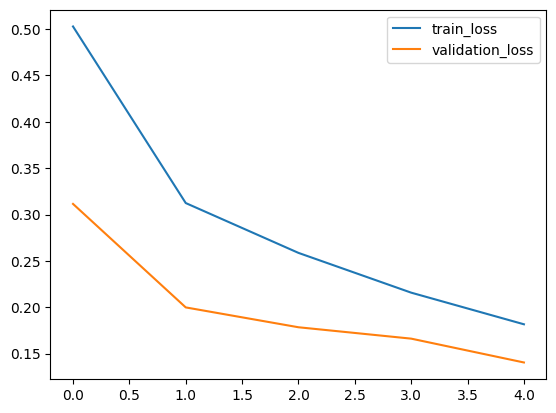

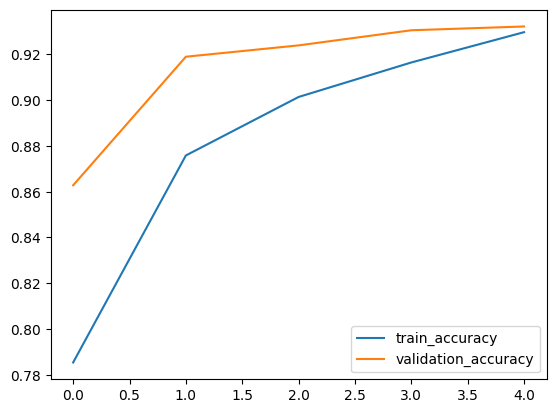

In [33]:
h = history
plt.plot(h.history['loss'], label = 'train_loss')
plt.plot(h.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label = 'train_accuracy')
plt.plot(h.history['val_acc'], label = 'validation_accuracy')
plt.legend()
plt.show()






Path of the image to be predicted: /content/test image 1.jpg


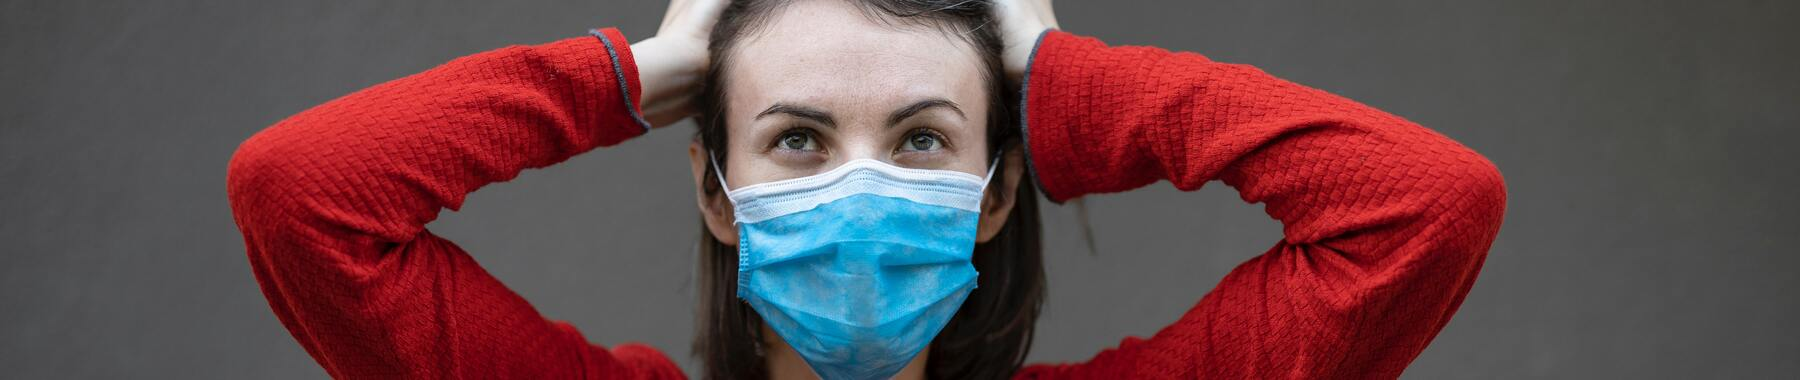

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
[[0.49365166 0.5113586 ]]
1
The person is wearing mask


In [34]:
# Making predictive system
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (128,128))
input_image_scale = input_image_resize/255
input_image_reshape = np.reshape(input_image_scale, [1,128,128,3])
input_prediction = model.predict(input_image_reshape)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label ==1:
  print('The person is wearing mask')
else:
  print('The person is not wearing the mask')


Path of the image to be predicted: /content/test image without mask.jpg


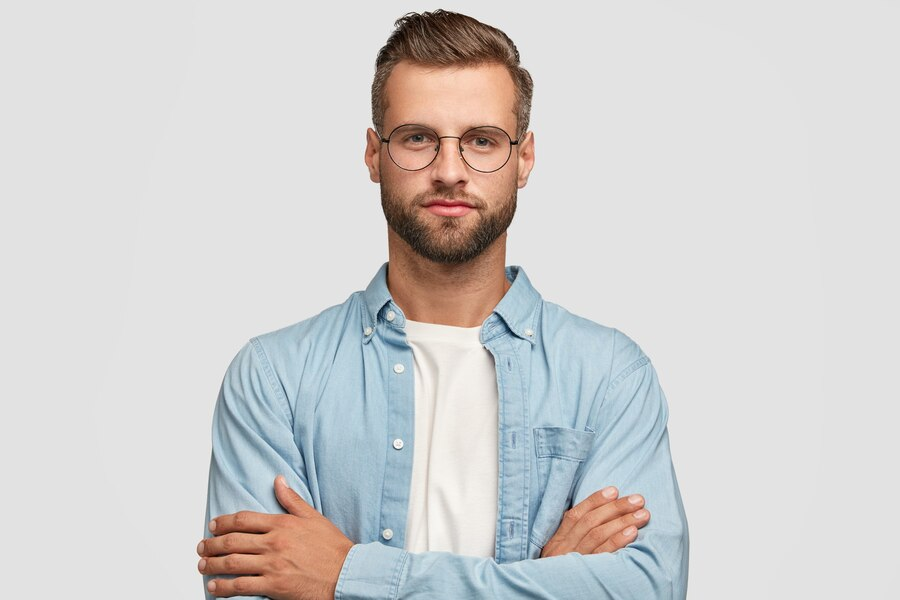

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.5434911 0.4856823]]
0
The person is not wearing the mask


In [35]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (128,128))
input_image_scale = input_image_resize/255
input_image_reshape = np.reshape(input_image_scale, [1,128,128,3])
input_prediction = model.predict(input_image_reshape)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label ==1:
  print('The person is wearing mask')
else:
  print('The person is not wearing the mask')

Path of the image to be predicted: /content/test image 2.jpg


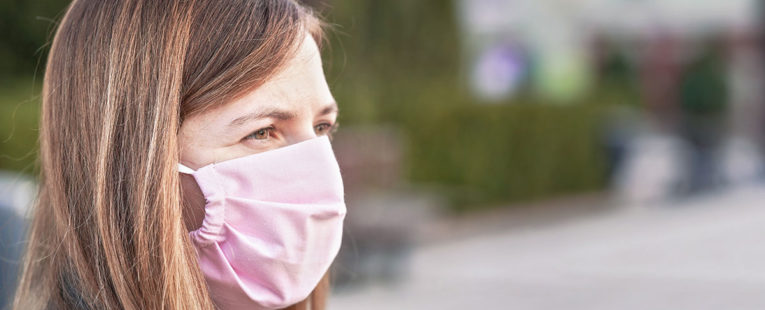

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.22760542 0.79990786]]
1
The person is wearing mask


In [36]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (128,128))
input_image_scale = input_image_resize/255
input_image_reshape = np.reshape(input_image_scale, [1,128,128,3])
input_prediction = model.predict(input_image_reshape)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label ==1:
  print('The person is wearing mask')
else:
  print('The person is not wearing the mask')